# Regressao Linear Simples


 Legendas:
   * <code style="color:green">Explicação Conteúdo</code>
   * <code style="color:purple">Dicas / Comandos / Comentários</code>
   * <code style="color:red">Prática</code>


In [4]:
import pandas as pd # importando a biblioteca de manipulação de dados
import statsmodels.api as sm # biblioteca para a regressão logística
import numpy as np # biblioteca para calculo
from matplotlib import pyplot as plt # importando a biblioteca de visualização de dados 
import seaborn as sns# importando a biblioteca de visualização de dados 
from tabulate import tabulate # biblioteca para estilizar tabelas
from sklearn.metrics import mean_squared_error, mean_absolute_error # funções de erro
from statsmodels.stats.outliers_influence import variance_inflation_factor # funções para calcular o vif
import scipy.stats as stats # biblioteca para modelagem
import pylab # biblioteca para o qqplot
from statsmodels.stats.diagnostic import het_breuschpagan # função para o teste de breusch-pagan
from scipy.stats import shapiro # teste de normalidade

### <code style="color:green">DISCUSSÃO:</code>

No python, utilizando as bibliotecas mais conhecidas, não encontramos os métodos de seleção backward, forward e setpwise. Logo, a solução para quando se quer utilizá-los é criar alguma função que o faça.

Sendo assim, criamos algumas funções que serão utilizadas em aula para seleção de variáveis e análise exploratória:

In [5]:
from funcoes_importantes_regressao_linear import step, graficos_var_num

### <code style="color:green">Vamos começar:</code>

Com o intuito de explorar os comandos do Python, iniciaremos com um exemplo simples e fictício:

In [6]:
#Criando a base de dados
dados_pizzaria = pd.DataFrame({"estudantes": [2,6,8,8,12,16,20,20,22,26],
                              "pizza": [55,105,88,118,117,137,157,169,149,202]
                              })

### <code style="color:green">Conhecendo o Meu Quadro a Desenhar</code>

Antes de se realizar qualquer modelagem, devemos sempre analisar nossa variável dependente.

Aqui podemos fazer uso de tudo que aprendemos:

 - Análises Descritivas;
 - Gráficos BoxPlot;
 - Gráficos Histograma;
 - Gráfico de Dispersão.
 
 A idéia é se ter uma noção do que seus dados são e se possuem algo de estranho!!


In [7]:
# variavel dependente (pizza)
dados_pizzaria["pizza"].describe()

count     10.000000
mean     129.700000
std       42.387236
min       55.000000
25%      108.000000
50%      127.500000
75%      155.000000
max      202.000000
Name: pizza, dtype: float64

### <code style="color:purple">DICAS:</code>

* Observe a mediana (50%) e média (mean), estão próximas?
* O valor do mínimo (min) e máximo (max), possui um valor que é muito estranho? (ex: valores negativos no min e valor = 0 no max).
* Sempre é bom olhar os quartis e realmente entender o movimento dos dados em questão.

<Axes: xlabel='pizza', ylabel='Count'>

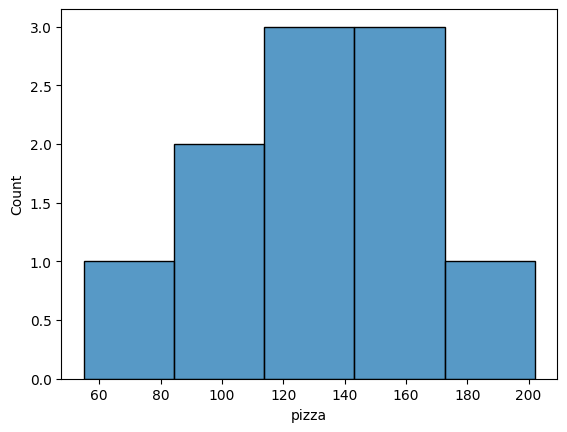

In [8]:
#histograma da variável dependente
sns.histplot(data=dados_pizzaria, x="pizza")

C:\Users\mattr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


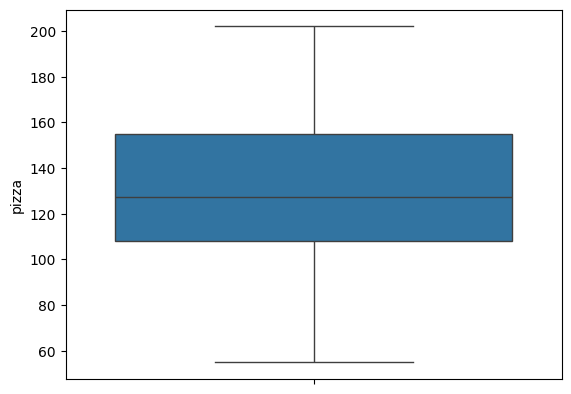

In [9]:
#boxplot da variável dependente
#dados_pizzaria["pizza"].plot(kind = "box")
sns.boxplot(dados_pizzaria["pizza"])
plt.show()

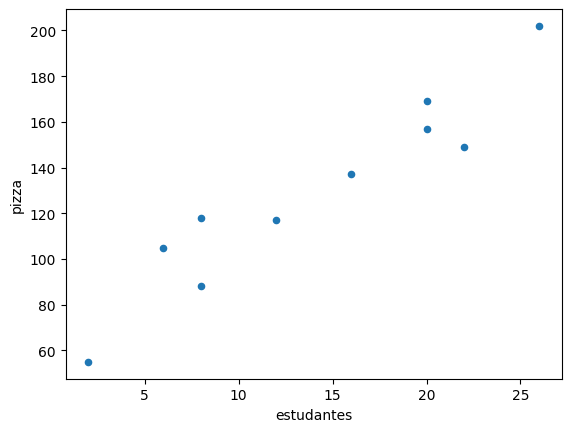

In [10]:
#gráfico de dispersão da variável dependente e independente
dados_pizzaria.plot(kind = "scatter", x= "estudantes",y="pizza")
plt.show()

### <code style="color:purple">DICAS:</code>

* Você vê alguma relação entre a variável de estudantes com pizza? (ex: quando uma cresce a outra cresce junto.)
* Se deu vontade de traçar uma linha, então é factível pensar em fazer uma regressão linear.

### <code style="color:green">Traçando um Modelo de Regressão</code>

Se deu vontade de traçar a linha, então vamos criar um modelinho de regressão linear simples!
Para isso, vamos primeiro separar o que é a variável independente (estudantes) e a variável dependente (pizza).
Para isso vamos apenas selecionar as colunas e armazená-las em objetos diferentes. 

Temos as seguintes especificações:
- sm: É o apelido que demos ao nome da biblioteca statsmodels
- sm.add_constant: Vamos adicionar o B0 ao modelo, criando uma nova coluna contendo apenas o valor 1
- sms.OLS(y,X): Vamos entregar ao modelo nossa variável X e y
- sms.OLS(y,X).fit(): Com o comando fit() chegamos nos parâmetros buscados

In [11]:
# selecionando nossa variável independente (normalmente utilizamos letra maiúscula por se tratar de uma matriz)
X = dados_pizzaria["estudantes"] 
# selecionando nossa variável dependente (normalmente utilizamos letra minúscula por se tratar de um vetor)
y = dados_pizzaria["pizza"] 
# Aqui lembre-se do B0. Basicamente vamos adicionar uma coluna de 1s para que o B0 seja calculado.
X = sm.add_constant(X) 
# Ajustando o modelo
reg_simples = sm.OLS(y, X).fit()

# Resumo do modelo
print(reg_simples.summary())

                            OLS Regression Results                            
Dep. Variable:                  pizza   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     72.46
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           2.79e-05
Time:                        11:30:49   Log-Likelihood:                -39.590
No. Observations:                  10   AIC:                             83.18
Df Residuals:                       8   BIC:                             83.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.8127      9.458      6.218      0.0

C:\Users\mattr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### <code style="color:purple">DICAS:</code>

- Legal né? O que você achou do modelo gerado?    
- Analise sempre a significância das suas variáveis independentes (teste t)!
- Veja também a significância geral (Teste F) do modelo e o coeficiente $R^{2}$. Ele é um bom modelo?    
- Inteprete os coeficientes, o que eles nos dizem? Que informação eles trazem?

### <code style="color:green">Analisando o Resultado do Modelo</code>


Agora vamos entender as principais medidas que serão necessárias para saber se o nosso modelo pode ser considerado como bom!

### <code style="color:purple">COMENTÁRIOS:</code>

- R-squared ($R^{2}$): Indica a proporção da variação na variável dependente que é explicada pelo modelo. Um valor de 0.901 significa que 90.1% da variação é explicada pelo modelo criado.

- Adjusted R-squared ($R^{2}$ ajustado): É uma versão ajustada do R² que leva em conta o número de variáveis no modelo.

- F-statistic (Estatística F): Utilizada para testar a significância global do modelo. É a estatística do teste que só poderá ser interpretada se comparada a estatística F tabelada com o nível de isgnificância de interesse.

- Prob (F-statistic) (Probabilidade da Estatística F): É a probabilidade da estatística F-statistic. Ou seja, o p-valor do teste F. Como alpha menor que nivel de significânica (assumindo 0.05), rejeita H0, o que quer dizer que pelo menos uma variável presta.

\begin{align*}
H_0: & \quad \beta_1 = \beta_2 = \cdots = \beta_k = 0 \\
H_1: & \quad \text{Ao menos um  é } \beta_i \neq 0
\end{align*}

- Log-Likelihood (Log-Verossimilhança): Mede a qualidade do ajuste do modelo. Valores mais altos indicam um melhor ajuste.

- AIC (Critério de Informação de Akaike): Avalia a qualidade do modelo, penalizando a complexidade. Valores menores indicam um modelo melhor. Não tem interpretação e é utilizado para comparação entre modelos.

- BIC (Critério de Informação Bayesiano): Similar ao AIC, mas com uma penalização maior para modelos mais complexos. Valores menores também indicam um modelo melhor. Não tem interpretação e é utilizado para comparação entre modelos.


### <code style="color:green">Coeficiente:</code>

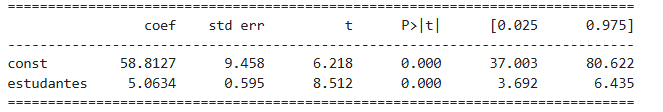

### <code style="color:purple">COMENTÁRIOS:</code>


- Coeficiente (coef): 58.0127: Este é o valor da constante no modelo de regressão. Representa o valor esperado da variável dependente quando todas as variáveis independentes são zero. (Lembrando que ele não é pago para ter interpretação.)

- Erro padrão (std err): 9.458: Mede a precisão do coeficiente estimado. Um erro padrão menor indica uma estimativa mais precisa (ou seja, em diferentes amostras os resultados seriam os mesmos).

- Valor t (t): 6.218: É o valor da estatística de teste para a significância dos coeficientes.

- P-valor (>|t|): 0.000: indica que o coeficiente é estatisticamente significativo (rejeita H0, ou seja, o parâmetro é diferente de zero).

\begin{align*}
H_0: & \quad \beta_i = 0 \\
H_1: & \quad \beta_i \neq 0
\end{align*}

- Intervalo de confiança [0.025, 0.975]: [37.083, 82.622]: Este intervalo mostra a faixa dentro da qual o coeficiente verdadeiro se encontra com 95% de confiança.

Interpretando os coeficientes, temos:

- Estudante: A cada aumento de uma unidade no número de estudantes, estima-se um acrescimo de 5 pizza vendidas.

### <code style="color:green">Qualidade dos Resíduos</code>

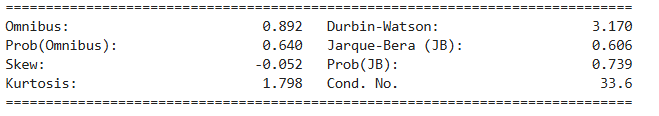

### <code style="color:purple">COMENTÁRIOS:</code>

- Omnibus: O teste Omnibus avalia se os resíduos seguem uma distribuição normal, considerando a assimetria e a curtose dos resíduos. Um valor de p grande sugere que os resíduos podem ser normais. Este valor representa a estatística do teste.

- Prob(Omnibus): Valor-p associado ao teste Omnibus, indicando a probabilidade de observar o resultado dado se a hipótese nula de distribuição normal for verdadeira. Idealmente, esperamos que os resíduos sejam normais para garantir que os pressupostos do modelo estejam corretos.

\begin{align*}
H_{0}: & \quad \text{Os resíduos são normais} \\
H_{1}: & \quad \text{Os resíduos não são normais}
\end{align*}

- Skew: Mede a assimetria da distribuição dos dados. Valores negativos de Skew indicam uma cauda mais longa à esquerda (distribuição assimétrica negativa), enquanto valores positivos indicam uma cauda mais longa à direita (distribuição assimétrica positiva).

- Kurtosis: Mede se a distribuição dos dados tem caudas mais pesadas ou mais leves em relação à distribuição normal. Valores de curtose maiores que 3 indicam que os dados têm caudas mais pesadas ou uma distribuição mais pontuda do que a normal.

- Durbin-Watson: Testa a autocorrelação nos resíduos de uma análise de regressão. O ideal é que os resíduos não podem ser correlacionados entre si!. Valores de Durbin-Watson próximos de 2 sugerem que não há autocorrelação nos resíduos. Valores próximos de 0 indicam autocorrelação positiva (os resíduos consecutivos estão correlacionados), enquanto valores próximos de 4 indicam autocorrelação negativa.

\begin{align*}
H_0: & \quad \text{Não há autocorrelação nos resíduos} \\
H_1: & \quad \text{Há autocorrelação nos resíduos}
\end{align*}

- Jarque-Bera (JB): O teste de Jarque-Bera verifica se os resíduos têm assimetria e curtose compatíveis com uma distribuição normal, baseando-se em uma combinação dessas duas métricas.

- Prob(JB): Valor-p para o teste Jarque-Bera, avaliando a probabilidade de observar tais estatísticas se a assimetria e a curtose corresponderem a uma distribuição normal.

\begin{align*}
H_0: & \quad \text{Os dados possuem assimetria e curtose que correspondem a uma distribuição normal} \\
H_1: & \quad \text{Os dados não possuem assimetria e curtose que correspondem a uma distribuição normal}
\end{align*}

- Cond. No: O Número de Condição avalia a multicolinearidade, ou seja, a correlação entre as variáveis independentes. Valores muito altos (geralmente acima de 30) indicam forte multicolinearidade, o que pode comprometer a estabilidade dos coeficientes estimados no modelo.



### <code style="color:green">Verificando o Quanto o Modelo Ficou Bom</code>

Agora vamos analisar o quanto nosso modelo se ajustou bem aos nossos dados e para isso vamos fazer o seguinte:

- Comparar os valores preditos, isto é os valores que meu modelo gerou para nossos dados com a média da variável dependente (lembre-se que a média também é um chute!) e os valores reais.

- Temos algumas métricas para medir a qualidade de ajuste, como o famosos MSE (Mean Square Error) e o RMSE (Mean Square Error). Lembre-se que o MSE é uma medida que não é diretamente interpretada (está na lua!), para isso temos que tirar a raiz (RMSE).


In [12]:
# criando uma nova variável para armazenar a média
dados_pizzaria["chute_media"] = dados_pizzaria["pizza"].mean() 
# criando uma nova variável para armazenar os valores da predição do nosso modelo
dados_pizzaria["chute_modelo"] = reg_simples.predict(X) 
dados_pizzaria 

,estudantes,pizza,chute_media,chute_modelo
0,2,55,129.7,68.939437
1,6,105,129.7,89.192958
2,8,88,129.7,99.319718
3,8,118,129.7,99.319718
4,12,117,129.7,119.573239
5,16,137,129.7,139.826761
6,20,157,129.7,160.080282
7,20,169,129.7,160.080282
8,22,149,129.7,170.207042
9,26,202,129.7,190.460563


### <code style="color:green">Verificando Visualmente</code>

Vamos criar um gráfico de dispersão para cada um dos chutes e o valor verdadeiro e então teremos uma noção de como o nosso modelo está se comportando.

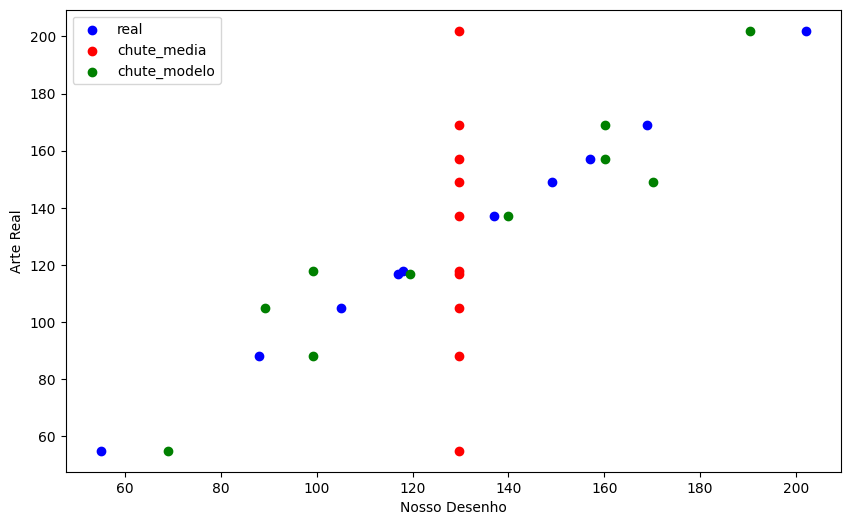

In [13]:
# definindo o tamanho da área do gráfico
plt.figure(figsize=(10, 6)) 
# adicionando a primeira camada que são nossos dados reais em azul
plt.scatter(dados_pizzaria["pizza"], dados_pizzaria["pizza"], color='blue', label='real') 
# adicionando a camada do chute da média em vermelho
plt.scatter(dados_pizzaria["chute_media"], dados_pizzaria["pizza"], color='red', label='chute_media') 
# adicionando a camada das nossas predições em verde
plt.scatter(dados_pizzaria["chute_modelo"], dados_pizzaria["pizza"], color='green', label='chute_modelo') 
plt.xlabel('Nosso Desenho')

plt.ylabel('Arte Real')
plt.legend()
plt.show()

### <code style="color:purple">DICAS:</code>

- Belo desenho não é mesmo? 
- Note que nosso modelo está mais próximo dos valores reais do que o chute da média
- Será que ele terá um bom desempenho nas métricas de qualidade de ajuste?

### <code style="color:green">Métricas de Qualidade de Ajuste</code>

- Vamos calcular o MSE e o RMSE.
- Valores mais próximos de 0 indicam um bom RMSE no geral, mas se o RMSE do modelo for melhor que o RMSE da média, então podemos considerar que é um bom modelo.
- Usaremos o numpy para calcular, já que ele foi feito para cálculo numérico

Fórmula do MSE:

\begin{equation}
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{equation}

onde:
- $n$ é o número de observações.
- $y_i$ é o valor observado.
- $\hat{y}_i$ é o valor predito.

Fórmula do RMSE:

\begin{equation}
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
\end{equation}

Nota: o conceito de variância (MSE) e desvio padrão (RMSE)

In [14]:
# Calculando MSE e RMSE do modelo
# Média de erro do meu modelo ao quadrado (MSE - Mean Square Error)
mse_modelo = np.mean((dados_pizzaria["pizza"] - dados_pizzaria["chute_modelo"])**2)
mse_modelo

160.78183098591552

In [15]:
# Raiz da média de erro do meu modelo ao quadrado (RMSE - Root Mean Square Error)
rmse_modelo = np.sqrt(mse_modelo)
rmse_modelo

12.67997756251625

In [16]:
# Média de erro do modelo média (a famosa variância populacional)
mse_usando_media = np.mean((dados_pizzaria["pizza"] - dados_pizzaria["chute_media"])**2)
mse_usando_media

1617.0099999999998

In [17]:
# Raiz da media de erro do modelo media (o famoso desvio padrão populacional)
rmse_usando_media = np.sqrt(mse_usando_media)
rmse_usando_media

40.21206286675678

### <code style="color:purple">DICAS:</code>

- Note o quanto nosso modelo foi bem melhor que o chute da média.
- Pelo RMSE vemos que o erro do modelo foi bem menor que o erro da média, de 40 (chute geral) para 12 (chutando com o modelo).
- Agora vamos complicar um pouco as coisas. Vamos analisar uma nova base de dados:

### <code style="color:green">Brincando e Aprendendo com o Problema Bodyfat</code>

Vamos iniciar com uma nova base de dados. Observe abaixo o dicionário:

- Density: Densidade corporal, usada para calcular a gordura corporal (esta variável não será utilizada na nossa análise).
- bodyfat: Percentual de gordura corporal, a variável alvo.
- Age: Idade do indivíduo em anos.
- Weight: Peso em libras.
- Height: Altura em polegadas.
- Neck: Circunferência do pescoço em polegadas.
- Chest: Circunferência do peito em polegadas.
- Abdomen: Circunferência abdominal em polegadas.
- Hip: Circunferência do quadril em polegadas.
- Thigh: Circunferência da coxa em polegadas.
- Knee: Circunferência do joelho em polegadas.
- Ankle: Circunferência do tornozelo em polegadas.
- Biceps: Circunferência do bíceps em repouso, em polegadas.
- Forearm: Circunferência do antebraço em polegadas.
- Wrist: Circunferência do punho em polegadas.

In [18]:
#importando a base de dados
Bodyfat= pd.read_csv("dados/Bodyfat.csv")
Bodyfat.head()

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [19]:
# tirando uma variavel que não será usada (contexto negocio)
Bodyfat = Bodyfat.drop(["Density"], axis=1)
Bodyfat.head()

,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### <code style="color:green">Conhecendo Minha Variável y</code>

Vamos fazer uma análise descritiva da nossa variável y.

Essa é a minha variável mais importante, pois é ela que eu vou prever. Sendo assim, ela deve ter qualidade (bom, todas as outras também, hahaha).

Aqui, poderia surgir um questionamento sobre o outlier e, quem sabe, eu descubra que isso foi um erro de digitação. Por ser a variável resposta, é melhor deletar esse indivíduo do que tentar chutar um valor para ele.

Esse é o tipo de pergunta que eu faria para o negócio, se faz sentido.



In [20]:
# variavel dependente (bodyfat)
Bodyfat["bodyfat"].describe()

count    252.000000
mean      19.150794
std        8.368740
min        0.000000
25%       12.475000
50%       19.200000
75%       25.300000
max       47.500000
Name: bodyfat, dtype: float64

C:\Users\mattr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\mattr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


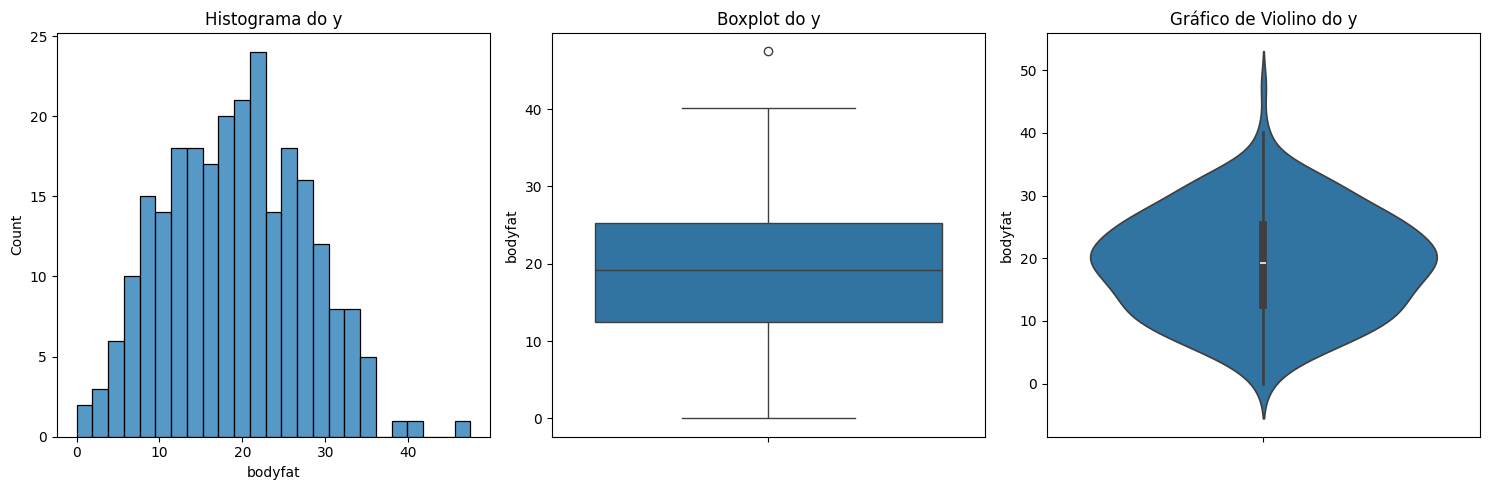

In [21]:
# Farei vários gráficos do minha variável y
# Definindo o tamanho da figura e criando três subplots em uma linha (1x3)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Histograma
sns.histplot(data=Bodyfat, x="bodyfat", bins=25, ax=axs[0])
axs[0].set_title("Histograma do y")

# Boxplot
sns.boxplot(y="bodyfat", data=Bodyfat, ax=axs[1])
axs[1].set_title("Boxplot do y")

# Gráfico de violino
sns.violinplot(y="bodyfat", data=Bodyfat, ax=axs[2])
axs[2].set_title("Gráfico de Violino do y")

# Ajustar o layout para não sobrepor os títulos
plt.tight_layout()
plt.show()

### <code style="color:green">Assumindo Que Exista Apenas a Variável X = Wrist</code>


Vamos analisar essa variável primeiro, as demais ficarão para depois. Um passo de cada vez!


### <code style="color:red">Para praticar:</code>

- Faça você, explore a variável Wrist
- Use as medidas descritivas (média, moda, mediana,.., etc)
- Utilize gráficos como histograma, Boxplot!


In [22]:
# a variavel explicativa (Wrist)
Bodyfat["Wrist"].describe()

count    252.000000
mean      18.229762
std        0.933585
min       15.800000
25%       17.600000
50%       18.300000
75%       18.800000
max       21.400000
Name: Wrist, dtype: float64

C:\Users\mattr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\mattr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


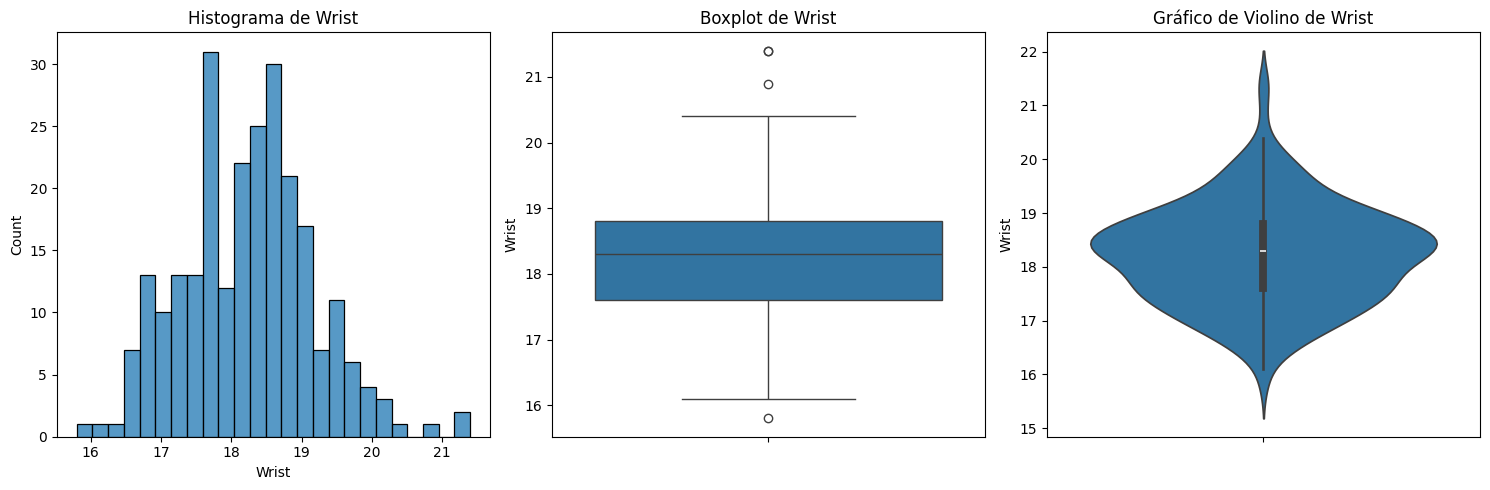

In [23]:
#vou usar para a variável Wrist
graficos_var_num(base=Bodyfat, variavel="Wrist")

### <code style="color:purple">COMENTÁRIOS:</code>

- É uma distribuição com outlier para cima e para baixo (será que existe pulso assim – tão grande ou tão pequeno?). Está aí mais uma coisa que eu confirmaria com o médico.

- Não tem missing.

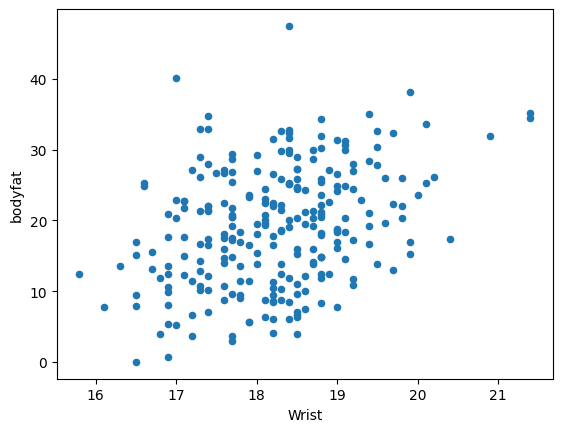

In [24]:
# dispersao entre elas (y e x)
Bodyfat.plot(kind = "scatter", x= "Wrist",y="bodyfat")
plt.show()

### <code style="color:red">Para praticar:</code>

- Faça você, calcule a correlação entre X e Y


In [25]:
# correlacao entre as duas variaveis
Bodyfat[["bodyfat","Wrist"]].corr()

,bodyfat,Wrist
bodyfat,1.000000,0.346575
Wrist,0.346575,1.000000


### <code style="color:red">Para praticar:</code>

- Faça você, gere uma equação de regressão linear simples entre bodyfat e wrist




In [26]:
# selecionando nossa variável independente
X = Bodyfat["Wrist"]
# selecionando nossa variável dependente
y = Bodyfat["bodyfat"]
# Aqui lembre-se do B0. Basicamente vamos adicionar uma coluna de 1s para que o B0 seja calculado.
X = sm.add_constant(X)
# Ajustando o modelo
reg_gordura_wrist = sm.OLS(y, X).fit()
# Resumo do modelo
print(reg_gordura_wrist.summary())

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     34.13
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           1.60e-08
Time:                        11:30:51   Log-Likelihood:                -876.32
No. Observations:                 252   AIC:                             1757.
Df Residuals:                     250   BIC:                             1764.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.4841      9.707     -3.861      0.0

### <code style="color:green">Verificando o Quanto o Modelo Ficou Bom</code>

- Vamos refazer o que fizemos com o exemplo das pizzas!


In [27]:
# calculando a média e adicionando na coluna
Bodyfat["chute_media"] = Bodyfat["bodyfat"].mean() 
# pegando os valores preditos
Bodyfat["chute_modelo"] = reg_gordura_wrist.predict(X) 
Bodyfat.head()

,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,chute_media,chute_modelo
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,19.150794,15.640930
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,19.150794,19.058331
2,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,19.150794,14.087566
3,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,19.150794,19.058331
4,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,19.150794,17.504967


### <code style="color:green">Visualizando os Dados</code>

- Agora vamos observar o gráfico de dispersão!


### <code style="color:red">Para praticar:</code>

- Faça você, plote a ARTE e os seus desenhos

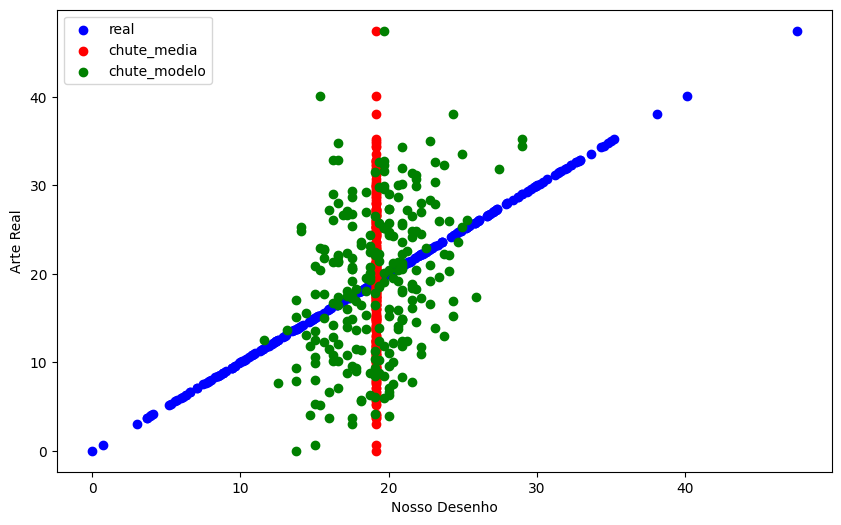

In [28]:
# definindo o tamanho da área do gráfico
plt.figure(figsize=(10, 6))
# adicionando a primeira camada que são nossos dados reais em azul
plt.scatter(Bodyfat["bodyfat"], Bodyfat["bodyfat"], color='blue', label='real')
# adicionando a camada do chute da média em vermelho
plt.scatter(Bodyfat["chute_media"], Bodyfat["bodyfat"], color='red', label='chute_media')
# adicionando a camada das nossas predições em verde
plt.scatter(Bodyfat["chute_modelo"], Bodyfat["bodyfat"], color='green', label='chute_modelo')

plt.xlabel('Nosso Desenho')
plt.ylabel('Arte Real')
plt.legend()
plt.show()

### <code style="color:green">Através Das Métricas de Qualidade de Ajuste</code>

- Agora vamos analisar o MSE e o RMSE deste modelo.


### <code style="color:red">Para praticar:</code>

- Faça você, calcule o MSE e o RMSE desses dois chutes!

In [29]:
# Calculando MSE e RMSE do modelo
# Média de erro do meu modelo ao quadrado (MSE - Mean Square Error)
mse_modelo2 = np.mean((Bodyfat["bodyfat"] - Bodyfat["chute_modelo"])**2)
mse_modelo2

61.37898671447446

In [30]:
# Raiz da média de erro do meu modelo ao quadrado (RMSE - Root Mean Square Error)
rmse_modelo2 = np.sqrt(mse_modelo2)
rmse_modelo2

7.834474246206599

In [31]:
# Média de erro do modelo media (a famosa variância populacional)
mse_usando_media2 = np.mean((Bodyfat["bodyfat"] - Bodyfat["chute_media"])**2)
mse_usando_media2

69.75789619551523

In [32]:
# Raiz da media de erro do modelo media (o famoso desvio padrão populacional)
rmse_usando_media2 = np.sqrt(mse_usando_media2)
rmse_usando_media2

8.352119263726737

# Regressão Linear Múltipla

### <code style="color:green">Assumindo que existam todas as variáveis X´s</code>

- Agora vamos construir um modelo de regressão linear múltipla, isto é vamos considerar TODAS as variáveis da base de dados para a predição da gordura corporal.


In [33]:
Bodyfat.head()

,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,chute_media,chute_modelo
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,19.150794,15.640930
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,19.150794,19.058331
2,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,19.150794,14.087566
3,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,19.150794,19.058331
4,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,19.150794,17.504967


In [34]:
# criando o objeto X com as variáveis independentes, ou seja,
# tirando o que foi feito antes e a variável resposta
X = Bodyfat.drop(["bodyfat","chute_media","chute_modelo"],axis = 1)
# criando o objeto y com a variável dependente
y = Bodyfat["bodyfat"]
# Aqui lembre-se do B0. Basicamente vamos adicionar uma coluna de 1s para que o B0 seja calculado.
X = sm.add_constant(X)
# Ajustando o modelo
reg_gordura_full = sm.OLS(y, X).fit()
# Resumo do modelo
print(reg_gordura_full.summary())
# gerando a predição aravés desse modelo
chute_modelo_full = reg_gordura_full.predict(X)


                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           7.72e-64
Time:                        11:30:51   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.1885     17.349     -1.048      0.2

### <code style="color:purple">COMENTÁRIOS:</code>

Reflita:
    
- O que aconteceu com o modelo?
- Analise os testes estatísticos (t e o F)
- E o coeficiente $R^{2}$ ajustado?
- No geral, foi um bom modelo?
    

### <code style="color:green">Criando o modelo com seleção de variáveis</code>

Agora vamos utilizar os métodos de seleção de variáveis a fim de só utilizar variáveis realmente úteis.

Para isso temos três estratégias diferentes:

- `Backward`: Começaremos com todas as variáveis e vamos retirando uma a uma até encontrar o melhor modelo (mais nenhuma variável sair).
- `Forward`: Começaremos com o modelo nulo, ou seja apenas a constante e vamos adicionando variável por variável até encontrar o melhor modelo (nenhuma outra variável entrar).
- `StepWise`: Faremos o Backward e o Forward juntos (o famoso entra e sai).

Temos que selecionar qual medida usar para selecionar o melhor modelo:

- BIC
- AIC
- P-Valor

In [35]:
# Lembra que criamos funçõs logo no começo do código? Vamos utilizá-as
# Neste momento vou executar a regressão por forward pela métrica AIC

# criando o objeto X com as variáveis independentes, ou seja,
# tirando o que foi feito antes e a variável resposta
X = Bodyfat.drop(["bodyfat","chute_media","chute_modelo"],axis = 1)
# criando o objeto y com a variável dependente
y = Bodyfat["bodyfat"]
# executando a função criada para o método forward pela métrica AIC
colunas_forw = step(var_dependente = 'bodyfat', var_independente = X.columns.to_list(), 
                    base = Bodyfat, metodo = 'forward', metrica = 'aic') 
colunas_forw

,var,aic
7,"[Hip, Abdomen, Weight, Wrist, Forearm, Neck, Age, Thigh]",1456.996382
6,"[Thigh, Abdomen, Weight, Wrist, Forearm, Neck, Age]",1457.053833
5,"[Age, Abdomen, Weight, Wrist, Forearm, Neck]",1458.806253
4,"[Neck, Abdomen, Weight, Wrist, Forearm]",1459.441862
3,"[Forearm, Abdomen, Weight, Wrist]",1460.219691
2,"[Wrist, Abdomen, Weight]",1465.041213
1,"[Weight, Abdomen]",1471.184778
0,[Abdomen],1515.790337


### <code style="color:purple">COMENTÁRIOS: </code>

- Note que as melhores variáveis estão na primeira linha.
- Tanto no AIC quanto no BIC, quanto menor for o valor, melhor o modelo será
- Agora vamos pegar essas colunas e criar o modelo

In [36]:
# colocando em uma lista o nome de todas as variaveis do modelo com menor aic
X_forw = Bodyfat [ colunas_forw['var'].to_list()[0] ]
# Aqui lembre-se do B0. Basicamente vamos adicionar uma coluna de 1s para que o B0 seja calculado.
X_forw = sm.add_constant(X_forw)
# Ajustando o modelo
forw = sm.OLS(y, X_forw).fit()
# Resumo do modelo
print(forw.summary()) 
# gerando a predição aravés desse modelo
pred_forw = forw.predict(X_forw)

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     89.47
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           4.92e-68
Time:                        11:30:52   Log-Likelihood:                -719.50
No. Observations:                 252   AIC:                             1457.
Df Residuals:                     243   BIC:                             1489.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.6564     11.714     -1.934      0.0

### <code style="color:purple">COMENTÁRIOS: </code>

- Reparou que existem p-valores não significativos? Sabe porquê?

Vou testar por outro alguns método agora: backward pelo AIC, forward pelo AIC, setpwise pelo AIC, setpwise pelo p-valor

In [37]:
# regressao por backward com a regra de AIC
colunas_backw = step(var_dependente = 'bodyfat', var_independente = X.columns.to_list(), base = Bodyfat, metodo = 'backward' ,metrica = 'aic')
colunas_backw

,var,aic
5,"[Age, Weight, Neck, Abdomen, Hip, Thigh, Forearm, Wrist]",1456.996382
4,"[Age, Weight, Neck, Abdomen, Hip, Thigh, Biceps, Forearm, Wrist]",1457.822171
3,"[Age, Weight, Neck, Abdomen, Hip, Thigh, Ankle, Biceps, Forearm, Wrist]",1459.066261
2,"[Age, Weight, Height, Neck, Abdomen, Hip, Thigh, Ankle, Biceps, Forearm, Wrist]",1460.571306
1,"[Age, Weight, Height, Neck, Chest, Abdomen, Hip, Thigh, Ankle, Biceps, Forearm, Wrist]",1462.506597
0,"[Age, Weight, Height, Neck, Chest, Abdomen, Hip, Thigh, Knee, Ankle, Biceps, Forearm, Wrist]",1464.502374


In [38]:
# colocando em uma lista o nome de todas as variaveis do modelo com menor aic
X_backw = Bodyfat [ colunas_backw['var'].to_list()[0] ] 
# Aqui lembre-se do B0. Basicamente vamos adicionar uma coluna de 1s para que o B0 seja calculado.
X_backw = sm.add_constant(X_backw)
# Ajustando o modelo
backw = sm.OLS(y, X_backw).fit()
# Resumo do modelo
print(backw.summary()) 
# gerando a predição aravés desse modelo
pred_backw = backw.predict(X_backw)

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     89.47
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           4.92e-68
Time:                        11:30:52   Log-Likelihood:                -719.50
No. Observations:                 252   AIC:                             1457.
Df Residuals:                     243   BIC:                             1489.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.6564     11.714     -1.934      0.0

In [39]:
# regressao por stepwise com a regra de AIC
colunas_stepw = step(var_dependente = 'bodyfat', var_independente = X.columns.to_list(), base = Bodyfat, metodo = 'both' ,metrica = 'aic')
colunas_stepw

,var,aic
0,"[Hip, Abdomen, Weight, Wrist, Forearm, Neck, Age, Thigh]",1456.996382


In [40]:
# colocando em uma lista o nome de todas as variaveis do modelo com menor aic
X_stepw = Bodyfat [ colunas_stepw['var'].to_list()[0] ] 
# Aqui lembre-se do B0. Basicamente vamos adicionar uma coluna de 1s para que o B0 seja calculado.
X_stepw = sm.add_constant(X_stepw)
# Ajustando o modelo
stepw = sm.OLS(y, X_stepw).fit()
# Resumo do modelo
print(stepw.summary()) 
# gerando a predição aravés desse modelo
pred_stepw = stepw.predict(X_stepw)

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     89.47
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           4.92e-68
Time:                        11:30:52   Log-Likelihood:                -719.50
No. Observations:                 252   AIC:                             1457.
Df Residuals:                     243   BIC:                             1489.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.6564     11.714     -1.934      0.0

In [41]:
# regressao por stepwise com a regra de p-valor
colunas_stepw_p = step(var_dependente = 'bodyfat', var_independente = X.columns.to_list(), base = Bodyfat, metodo = 'both' ,metrica = 'pvalor')
colunas_stepw_p

C:\Users\mattr\Documents\trabalho\validacao_aulas\regressao_modulo\funcoes_importantes_regressao_linear.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvalor = modelo.pvalues[1]
C:\Users\mattr\Documents\trabalho\validacao_aulas\regressao_modulo\funcoes_importantes_regressao_linear.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvalor = modelo.pvalues[1]
C:\Users\mattr\Documents\trabalho\validacao_aulas\regressao_modulo\funcoes_importantes_regressao_linear.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

,var
0,Abdomen
1,Weight
2,Wrist
3,Forearm


In [42]:
# colocando em uma lista o nome de todas as variaveis do modelo com p-valor
X_stepw_p = Bodyfat[colunas_stepw_p['var'].to_list()] 
# Aqui lembre-se do B0. Basicamente vamos adicionar uma coluna de 1s para que o B0 seja calculado.
X_stepw_p = sm.add_constant(X_stepw_p)
# Ajustando o modelo
stepw_p = sm.OLS(y, X_stepw_p).fit()
# Resumo do modelo
print(stepw_p.summary()) 
# gerando a predição aravés desse modelo
pred_stepw_p = stepw_p.predict(X_stepw_p)

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     171.3
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           5.39e-70
Time:                        11:30:52   Log-Likelihood:                -725.11
No. Observations:                 252   AIC:                             1460.
Df Residuals:                     247   BIC:                             1478.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.8541      7.245     -4.811      0.0

### <code style="color:purple">COMENTÁRIOS: </code>

- Reparou que os p-valores estão todos significativos por esse método?

### <code style="color:green">Verificando o Quanto os Modelos Ficaram Bons</code>

- Agora é hora de verificar nossos modelos criados!


### <code style="color:red">Para praticar:</code>

- Faça você, crie as novas tentativas
- Adicione os chutes na base
- Cuidado com os nomes dos chutes!

In [43]:
# Não vou criar de tudo, porque os modelos ficaram os mesmos (backward pelo AIC, forward pelo AIC e setpwise pelo AIC)
tentativas = pd.DataFrame({
'chute_modelo_full': chute_modelo_full,
'chute_modelo_step_aic': pred_stepw,
'chute_modelo_step_pvalor':pred_stepw_p
})
tentativas.head()

,chute_modelo_full,chute_modelo_step_aic,chute_modelo_step_pvalor
0,16.152781,15.832123,16.275917
1,8.843704,9.079183,10.561541
2,18.556768,18.262865,18.710692
3,11.921455,12.227200,12.623798
4,27.291078,27.081936,26.182635


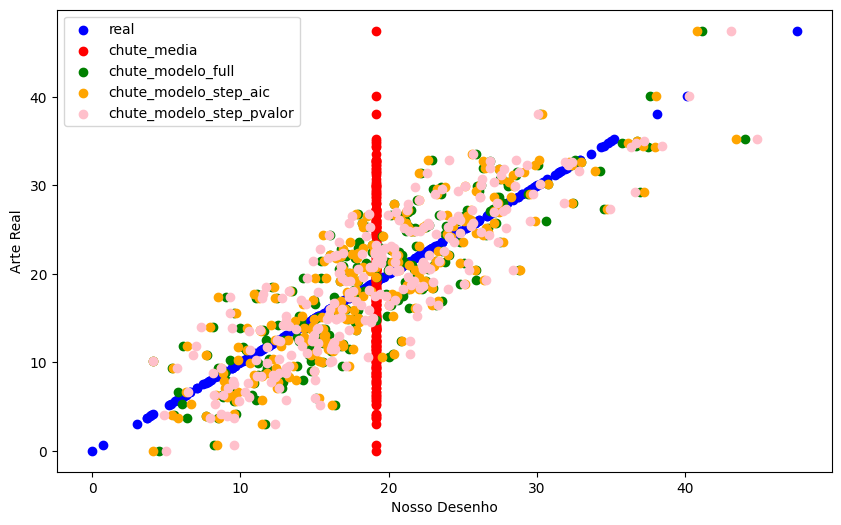

In [44]:
# definindo o tamanho da área do gráfico
plt.figure(figsize=(10, 6))
# adicionando a primeira camada que são nossos dados reais em azul
plt.scatter(Bodyfat["bodyfat"], Bodyfat["bodyfat"], color='blue', label='real')
# adicionando a camada do chute da média em vermelho
plt.scatter(Bodyfat["chute_media"], Bodyfat["bodyfat"], color='red', label='chute_media')
# adicionando a camada das nossas predições do modelo completo (sem nenhuma seleção) em verde
plt.scatter(tentativas["chute_modelo_full"], Bodyfat["bodyfat"], color='green', label='chute_modelo_full')
# adicionando a camada das nossas predições do modelo stepwise pelo aic em laranja
plt.scatter(tentativas["chute_modelo_step_aic"], Bodyfat["bodyfat"], color='orange', label='chute_modelo_step_aic')
# adicionando a camada das nossas predições do modelo stepwise por p-valor em pink
plt.scatter(tentativas["chute_modelo_step_pvalor"], Bodyfat["bodyfat"], color='pink', label='chute_modelo_step_pvalor')

plt.xlabel('Nosso Desenho')
plt.ylabel('Arte Real')
plt.legend()
plt.show()

### <code style="color:red">Para praticar:</code>

- Faça você, calcule o MAE e o RMSE desses três novos chutes!

In [45]:
# vou utilizar funções prontas da sklearn.metrics
# Calculando o MAE
print("chute_media_mae:",mean_absolute_error(Bodyfat["bodyfat"], Bodyfat["chute_media"]))
print("chute_modelo_mae:",mean_absolute_error(Bodyfat["bodyfat"], Bodyfat["chute_modelo"]))
print("chute_modelo_full_mae:",mean_absolute_error(Bodyfat["bodyfat"], tentativas["chute_modelo_full"]))
print("chute_modelo_step_aic_mae:",mean_absolute_error(Bodyfat["bodyfat"], tentativas["chute_modelo_step_aic"]))
print("chute_modelo_step_pvalor_mae:",mean_absolute_error(Bodyfat["bodyfat"], tentativas["chute_modelo_step_pvalor"]))
print('')
print('-------------------------')

# Calculando o MSE
mse_chute_media = mean_squared_error(Bodyfat["bodyfat"], Bodyfat["chute_media"])
mse_chute_modelo = mean_squared_error(Bodyfat["bodyfat"], Bodyfat["chute_modelo"])
mse_chute_modelo_full = mean_squared_error(Bodyfat["bodyfat"], tentativas["chute_modelo_full"])
mse_chute_modelo_step_aic= mean_squared_error(Bodyfat["bodyfat"], tentativas["chute_modelo_step_aic"])
mse_chute_modelo_step_pvalor= mean_squared_error(Bodyfat["bodyfat"], tentativas["chute_modelo_step_pvalor"])

# Calculando e imprimindo o RMSE
print("chute_media_rmse:",np.sqrt(mse_chute_media))
print("chute_modelo_rmse:",np.sqrt(mse_chute_modelo))
print("chute_modelo_full_rmse:",np.sqrt(mse_chute_modelo_full))
print("chute_modelo_step_aic_rmse:",np.sqrt(mse_chute_modelo_step_aic))
print("chute_modelo_step_pvalor_rmse:",np.sqrt(mse_chute_modelo_step_pvalor))

chute_media_mae: 6.860304862685815
chute_modelo_mae: 6.380313574411851
chute_modelo_full_mae: 3.4393682755404886
chute_modelo_step_aic_mae: 3.43890459381402
chute_modelo_step_pvalor_mae: 3.5424367416246882

-------------------------
chute_media_rmse: 8.352119263726737
chute_modelo_rmse: 7.834474246206599
chute_modelo_full_rmse: 4.183986878853228
chute_modelo_step_aic_rmse: 4.204742346179293
chute_modelo_step_pvalor_rmse: 4.299425841785601


### <code style="color:green">Comparar efeitos e variações</code>

- Agora vamos analisar os nossos coeficientes observando o intervalo de confiança (apesar que já sai no summary)
- Vamos gerar os gráficos dos intervalos para facilitar a visualização

In [46]:
# pegando o intervalo de confiança dos coeficientes menos o B0
intervalo_confianca_forward = stepw_p.conf_int(alpha=0.05)[1:] 
intervalo_confianca_forward

,0,1
Abdomen,0.885324,1.106179
Weight,-0.184376,-0.086887
Wrist,-2.377443,-0.633681
Forearm,0.115127,0.830730


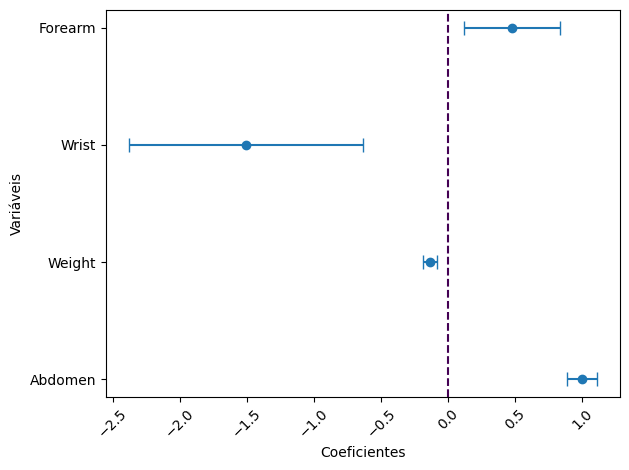

In [47]:
# criando o gráfico para o intervalo de confiança
fig, ax = plt.subplots() 

ax.errorbar(stepw_p.params.drop(['const']), # pegando os valores dos coeficientes e retirando a constante 
            stepw_p.params.drop(['const']).index,  # pegando os nomes dos coeficientes e retirando a constante
            xerr=[stepw_p.params.drop(['const']) - intervalo_confianca_forward[0], # criando as barras dos intervalos (limite inferior) 
                  intervalo_confianca_forward[1] - stepw_p.params.drop(['const'])], # criando as barras dos intervalos (limite superior)
            fmt='o', capsize=5)

ax.set_xlabel('Coeficientes') # adicionando o rótulo do eixo x
ax.set_ylabel('Variáveis') # adicionando o rótulo do eixo y
ax.axvline(x=0,linestyle='--', color = "#440154FF") # criando uma linha vertical no x = 0
plt.xticks(rotation=45) # adicionando uma rotação de 45 graus nos valores de x
plt.tight_layout()
plt.show()

### <code style="color:purple">DICAS:</code>

- Quando algum intervalo corta a linha do 0 significa que o coeficiente não foi significativo.
- Note que todas, neste caso, foram significativas.

### <code style="color:green">Análise de Resíduo</code>

 Vamos agora analisar os resíduos do nosso modelo. O resíduo nada mais é que o erro do nosso modelo, ou seja o quanto ele está errando. Nesse caso, devemos analisar um conjunto de características para considerar o nosso modelo como um modelo robusto:
 
- Homogeneidade de variâncias: Vamos analisar o gráfico das predições sobre os resíduos. Se tiver algum tipo de padrão então as variâncias dos nossos resíduos são heterocedásticas, isto é não homogênea.

- Normalidade: Os resíduos precisam seguir uma distribuição normal com média igual a 0. Para isso vamos usar o QQ-Plot e teste estatítico

- Independência: Os resíduos não podem apresentar nenhum padrão conforme a variação de ychapeu

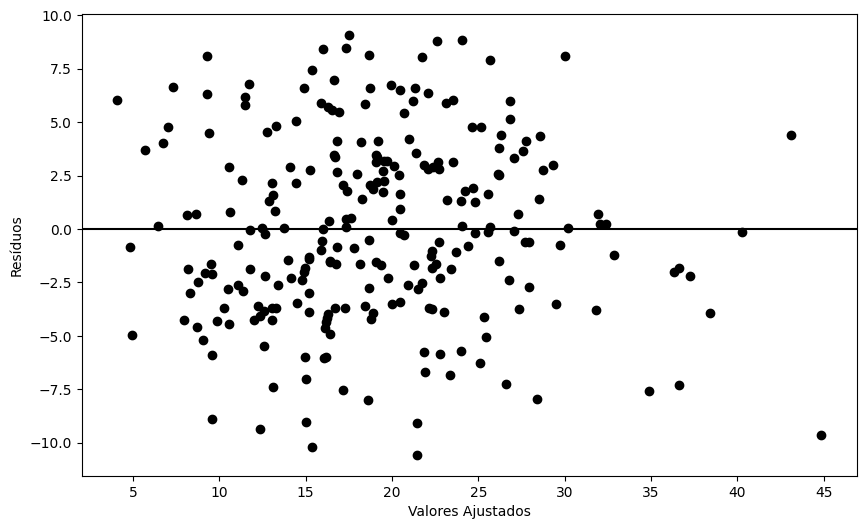

In [48]:
# criando gráfico de resíduos (resíduo x predito)
plt.figure(figsize=(10, 6))
plt.scatter(tentativas["chute_modelo_step_pvalor"],stepw_p.resid, color='black')
plt.axhline(y=0, color = 'black')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()

### <code style="color:purple">COMENTÁRIOS:</code>

- Note que os resíduos não apresentam nenhum padrão, ou seja, demonstram independência.


Testando normalidade através do Teste de Normalidade de Shapiro, qq-plot e histograma:

### <code style="color:green">Fazendo Teste de Normalidade de Shapiro + QQ-plot + Histograma</code>

Gráficos são um pouco subjetivos. Dependendo do problema a gente não vai conseguir enxergar algo ou tirar uma conclusão precipitada. Realizando testes estatísticos são mais confiáveis, portanto vamos testar a normalidade e a homogeneidade de variâncias.

Normalidade (Shapiro-Wilk):

- $H_{0}:$ Os resíduos são normais
- $H_{1}:$ Os resíduos não são normais

In [49]:
# ele gera a estatística do teste e o p-valor
shapiro(stepw_p.resid) 

ShapiroResult(statistic=0.9893701076507568, pvalue=0.0612778477370739)

[]

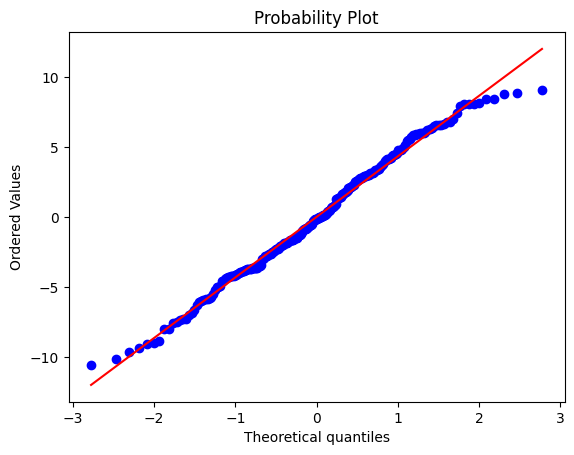

In [50]:
# qqplot 
stats.probplot(stepw_p.resid, dist="norm",plot=pylab)
pylab.plot()

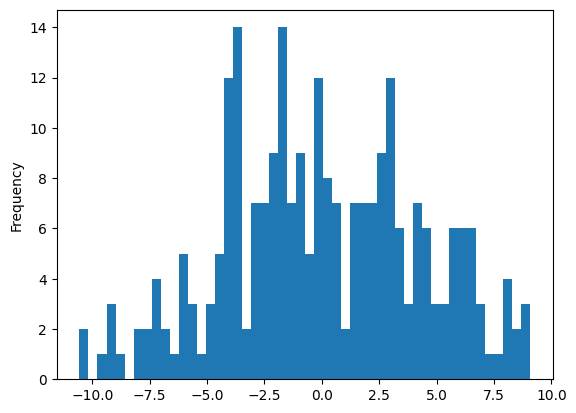

In [51]:
# visualizando o histograma
stepw_p.resid.plot(kind='hist', bins = 50)
plt.show()

### <code style="color:purple">COMENTÁRIOS:</code>

- Note que não rejeitamos $H_{0}$, logo os resíduos podem ser considerados como normais.
- Para que sejam considerados normais, os resíduos precisam seguir a linha em vermelho no qq-plot, o que pode indicar, novamente , normalidade.
- Pelo histograma, vemos uma um gráfico bem próximo da normalidade

### <code style="color:green">Fazendo o Teste de Homogeneidade de Variância</code>

Validando o pressuposto de Homogeneidade de Variâncias através do teste de Breusch-Pagan:

- $H_{0}:$ Os resíduos possuem homogeneidade nas variâncias
- $H_{1}:$ Os resíduos não possuem homogeneidade nas variâncias

In [52]:
# Realizando o teste de Breusch-Pagan para verificar heterocedasticidade
# Passamos os resíduos do modelo (stepw_p.resid) e as variáveis explicativas (stepw_p.model.exog)
teste_bp = het_breuschpagan(stepw_p.resid, stepw_p.model.exog)
# Definindo os rótulos para os resultados do teste
rotulos = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
# Usando zip para associar cada rótulo ao seu respectivo resultado do teste e convertendo em um dicionário
resultado_bp = dict(zip(rotulos, teste_bp))
# Exibindo o p-valor do LM-Test
print(resultado_bp['LM-Test p-value'])

0.7128004749928416


### <code style="color:purple">COMENTÁRIOS:</code>

- Note que não rejeitamos $H_{0}$, logo as variâncias dos resíduos podem ser considerados homogêneas.
- Sendo assim esse modelo passou nos 4 pressupostos!


### <code style="color:green">Multicolinearidade</code>

A multicolinearidade é um problema quando estamos tentando criar nosso modelo. Ela ocorre quando temos um conjunto de variáveis INDEPENDENTES que são altamente correlacionadas umas com as outras. O que gera um modelo com pouca confiabilidade. 

Vou analisar direto o VIF do modelo stepw_p:

In [53]:
# criando um dataframe vazio
vif = pd.DataFrame() 
# adicionando as colunas que você quer analisar (deixe a coluna const!)
vif["Variáveis"] =X_stepw_p.columns 
# para cada coluna, calcule o VIF
vif["VIF"] = [variance_inflation_factor(X_stepw_p.values, i) for i in range(len(X_stepw_p.columns))] 
vif

,Variáveis,VIF
0,const,701.380002
1,Abdomen,4.864380
2,Weight,7.040774
3,Wrist,2.273047
4,Forearm,1.793374


### <code style="color:purple">COMENTÁRIOS:</code>

- Agora como saber qual critério usar? Tem autores que adotam VIF > 1, outros para VIF > 5 e até  mesmo VIF > 10.

- Você que decide qual valor usar. Eu particularmente uso 3 ou 5, ou seja, este modelo, por mais que tenha passado na análise de resíduo está com o dilema da multicolinearidade.

- Lembre-se que uma variável pode influenciar no VIF da outra, por isso sempre começo observando a matrix de correlação a fim de selecionar as variáveis que fazem mais sentido serem mantidas. Diminuindo assim a chance de ter VIF alto.


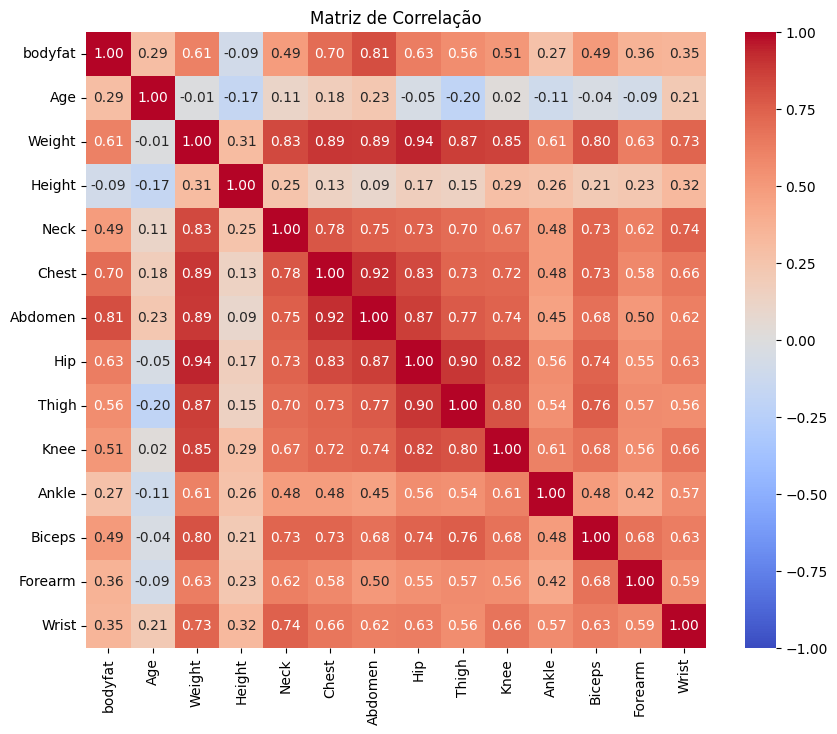

In [54]:
# vamos pegar da primeira até  a 14 coluna
correlacao = Bodyfat[Bodyfat.columns[np.arange(0,14)]].corr(method='pearson')

# Visualiza a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

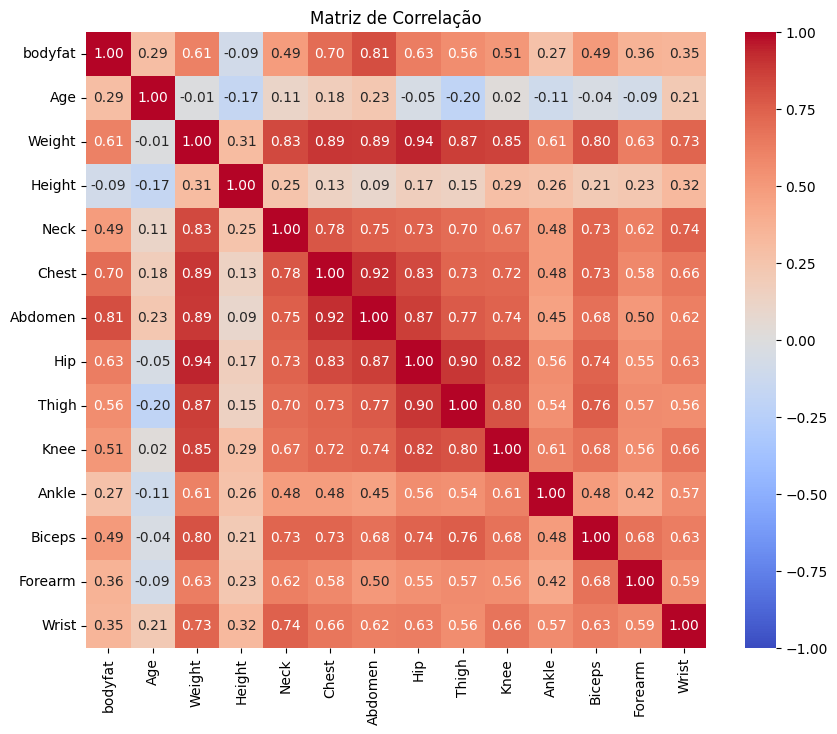

In [55]:
# vamos pegar da primeira até a coluna 14
correlacao = Bodyfat[Bodyfat.columns[np.arange(0,14)]].corr(method='pearson')
# Visualiza a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

### <code style="color:red">Para praticar:</code>

- Você está com a faca e o queijo na mão. Agora é a sua vez!! 
- Construa o Modelo Lindão estatisticamente falando (sem multicolinearidade e que passe na análise de resíduo).